### Table of Contents

- [Get the best model](#Get-the-best-model)
- [Get the test data](#Get-the-test-data)
- [Testing time](#Testing-time)
- [Business metrics](#Business-metrics)
- [Changing the threshold of predicting default](#Changing-the-threshold-of-predicting-default)
- [Plotting Gross Profit as a function of model threshold](#Plotting-Gross-Profit-as-a-function-of-model-threshold)
- [Coda](#Coda)

In [1]:
# to supress Warnings (if you've gotten tired of them) run this cell

import warnings
warnings.filterwarnings("ignore")


In [2]:
# common settings

# adjust settings to show all cols and rows
pd.options.display.max_columns = 80
pd.options.display.max_rows = 20


In [3]:
# common imports

from IPython.display import display, HTML
from ipywidgets import *

import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix


### Get the test data

In [4]:
# Load the test (held-out) data that have not yet been seen by the model

from LC_data_prep import load_and_prep_data, load_raw_rows

In [5]:
test_df = load_and_prep_data(load_test_data=True)

In [6]:
# set X and y
X = test_df.iloc[:,1:] # predictor variables
y = test_df["DEFAULT"] # response/target variable 
X.shape, y.shape

((266215, 35), (266215,))

### Get the best models

In [7]:
from LC_MMS import MMS, plot_ROCs, plot_PRCs

In [8]:
# Load the models fitted with the train data and put them to the test

mms = MMS()

### Testing time

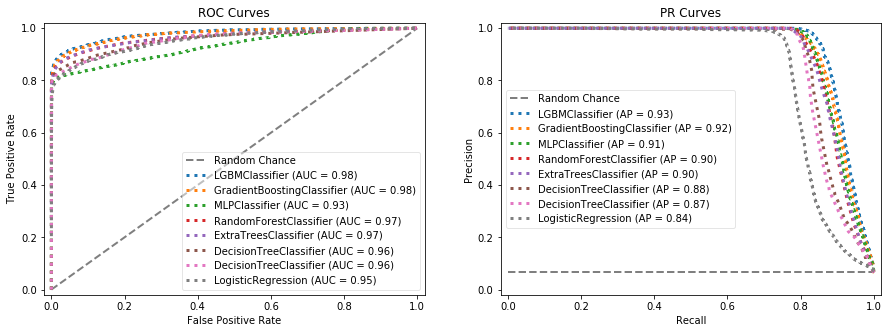

In [ ]:
# let's see the ROC and PRC curves

models_list = [ m[0] for m in mms.list_models(model_bins_too=True) ]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

plot_ROCs(models_list, X, y, use_predict_proba=True, ax=ax1)
plot_PRCs(models_list, X, y, use_predict_proba=True, ax=ax2);    

In [ ]:
# score the models' performances against the test data

model_list = []

for model in mms.list_models(model_bins_too=True):
    scores = mms.score_model(model[0], X, y, fit_and_add=False)  
    model_list.append( [model[0], model[1]] + scores )


Scoring model LGBMClassifier by ['accuracy', 'precision', 'recall', 'f1', 'neg_log_loss', 'roc_auc']


/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy: 0.987 (std: 0.000)


/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


precision: 0.992 (std: 0.001)


/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


recall: 0.815 (std: 0.001)


/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/omi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


f1: 0.895 (std: 0.001)
neg_log_loss: -0.049 (std: 0.000)
roc_auc: 0.980 (std: 0.000)
Scoring model GradientBoostingClassifier by ['accuracy', 'precision', 'recall', 'f1', 'neg_log_loss', 'roc_auc']


In [25]:
# let's see the scores in df and compare them to those obtained against the training data (in the notebook 3-B.)

models_df = pd.DataFrame( [_[1:] for _ in model_list], columns=['model_name', 'accuracy', 'precision', 'recall', 'f1', 'neg_log_loss', 'roc_auc'])
models_df.sort_values(by='roc_auc', ascending=False, inplace=True)
models_df


,model_name,accuracy,precision,recall,f1,neg_log_loss,roc_auc
0,LGBMClassifier,0.987379,0.992376,0.815059,0.894477,-0.048731,0.980561
1,GradientBoostingClassifier,0.985373,0.996289,0.780601,0.874873,-0.054506,0.978324
4,ExtraTreesClassifier,0.984554,0.999553,0.765792,0.867420,-0.093221,0.966999
3,RandomForestClassifier,0.985099,0.998972,0.774620,0.872739,-0.092736,0.966716
6,DecisionTreeClassifier,0.985035,0.983811,0.783505,0.873932,-0.087866,0.958033
5,StackingEstimator-StackingEstimator-StackingEs...,0.984851,0.976568,0.794840,0.874254,-0.113921,0.955051
7,LogisticRegression,0.953166,0.629310,0.817168,0.724666,-0.214391,0.954104
2,StandardScaler-MLPClassifier,0.984479,0.986045,0.787265,0.881823,-0.084641,0.929104


### Business metrics

In [26]:
the_best = mms.get_model(by_best_score='roc_auc')
the_best

LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, min_child_samples=10,
        min_child_weight=5, min_split_gain=0.0, n_estimators=200,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=0,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=50000, subsample_freq=1)

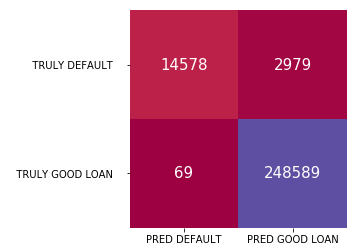

In [29]:
expected = y
predicted = the_best.predict(X)
cm = confusion_matrix(expected, predicted)

cm = cm[::-1,::-1] # reversed because of habit
sns.heatmap(cm,
             cbar=False,
             cmap='Spectral', 
             annot=True,
             square=True,
             fmt='d',
             annot_kws={'size': 15},
             yticklabels=['   TRULY DEFAULT   ','   TRULY GOOD LOAN   '],
             xticklabels=['PRED DEFAULT', 'PRED GOOD LOAN']
            );

In [30]:
f = pd.DataFrame( np.c_[expected,pd.Series(predicted)], columns=['e','p'] )

In [31]:
P = f[ f.e == 1 ].e.count()
P

17557

In [32]:
N = f[ f.e == 0 ].e.count()
N

248658

In [33]:
# count the bad loans that were classified as bad ones
TP = f [ (f.e == 1) & (f.p == 1) ].p.count()
TP

14578

In [34]:
# count the bad loans that were classified as good ones (type II error in stat)
FN = f [ (f.e == 1) & (f.p == 0) ].p.count()
FN

2979

In [35]:
# count the good loans that were classified as bad ones (type I error in stat)
FP = f [ (f.e == 0) & (f.p == 1) ].p.count()
FP

69

In [36]:
# count the good loans that were classified as good ones
TN = f [ (f.e == 0) & (f.p == 0) ].p.count()
TN

248589

In [37]:
PRECISION = TP / (TP+FP)
PRECISION

0.9952891377073804

In [38]:
RECALL = TP / (TP+FN)
RECALL

0.8303240872586433

In [40]:

@interact(show_pct=Checkbox(value=False,description='%'))
def plot_confusion_matrix(show_pct):
    ct = pd.crosstab( f.e, f.p, rownames=['Expected'], colnames=['Predicted'], margins=True, normalize=show_pct)
    ct = ct.reindex(index=(1,0,'All'),columns=(1,0,'All'))
    if show_pct:
        ct = ct.applymap( lambda v: '{:.2f}%'.format(100*v) )
    ct.index = ['Truly Bad Loan', 'Truly Good Loan', 'Pred All']
    ct.columns = ['Pred Bad Loan', 'Pred Good Loan', 'Truly All'] 
    return ct


interactive(children=(Checkbox(value=False, description='%'), Output()), _dom_classes=('widget-interact',))

In [41]:
raw_df = load_raw_rows(load_test_data=True)

enriched_test_df = test_df[["DEFAULT"]].join(raw_df, lsuffix='_test').reset_index()

pred_s = pd.Series(predicted)
pred_s.name = 'PRED'

assert len(pred_s) == len(enriched_test_df)

pred_n_test_df = pd.concat((pred_s,enriched_test_df), axis=1, ignore_index=False).set_index("id")

In [42]:
P_df = pred_n_test_df.query("DEFAULT==1")
bad_loan_loss = -1 * P_df.loan_amnt.sum()
"Bad Loan Loss: {:,.2f} (throughout the loans' period)".format(bad_loan_loss)

"Bad Loan Loss: -257,962,000.00 (throughout the loans' period)"

In [43]:
FN_df = pred_n_test_df.query("PRED==0 & DEFAULT==1")
bad_loan_loss_with_the_model = -1 * FN_df.loan_amnt.sum()
"Bad Loan Loss with The Model: {:,.2f} (throughout the loans' period)".format(bad_loan_loss_with_the_model)

"Bad Loan Loss with The Model: -44,394,275.00 (throughout the loans' period)"

In [44]:
N_df = pred_n_test_df.query("DEFAULT==0")
intrest_earned_s = N_df.loan_amnt * ( 1 + N_df.int_rate/12 )**N_df.term - N_df.loan_amnt
intrest_earned = intrest_earned_s.sum()
"Interest Earned: {:,.2f} (throughout the loans' periods)".format(intrest_earned)

"Interest Earned: 2,790,086,896.85 (throughout the loans' periods)"

In [45]:
TN_df = pred_n_test_df.query("PRED==0 & DEFAULT==0")
intrest_earned_with_the_model_s = TN_df.loan_amnt * ( 1 + TN_df.int_rate/12 )**TN_df.term - TN_df.loan_amnt
intrest_earned_with_the_model = intrest_earned_with_the_model_s.sum()
"Interest Earned with The Model: {:,.2f} (throughout the loans' periods)".format(intrest_earned_with_the_model)

"Interest Earned with The Model: 2,788,923,368.58 (throughout the loans' periods)"

In [46]:
gross_profit = intrest_earned + bad_loan_loss
"Gross Profit/Loss: {:,.2f} (throughout the loans' period)".format(gross_profit)

"Gross Profit/Loss: 2,532,124,896.85 (throughout the loans' period)"

In [47]:
gross_profit_with_the_model = intrest_earned_with_the_model + bad_loan_loss_with_the_model
"Gross Profit/Loss with The Model: {:,.2f} (throughout the loans' period)".format(gross_profit_with_the_model)

"Gross Profit/Loss with The Model: 2,744,529,093.58 (throughout the loans' period)"

In [48]:
roi = gross_profit/pred_n_test_df.loan_amnt.sum()
"ROI: {:,.2f} % (throughout the loans' period)".format(roi)

"ROI: 0.65 % (throughout the loans' period)"

In [49]:
roi_with_the_model = gross_profit_with_the_model/(FN_df.loan_amnt.sum()+TN_df.loan_amnt.sum())
"ROI: {:,.2f} % (throughout the loans' period)".format(roi_with_the_model)

"ROI: 0.74 % (throughout the loans' period)"

HTML(value="<b style='font-size:16px'> The financial results for test data without the predictive model throughout the loans' periods. </b>")

HTML(value='<b style="font-size:16px"> Gross Profit = \\$2,532,124,896.85 [ROI = 0.65%] </b>')

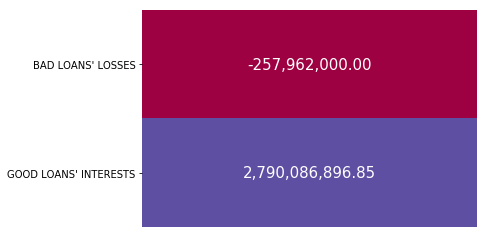

HTML(value="<b style='font-size:16px'>The results would have been better had the predictive model been deployed. </b>")

HTML(value='<b style="font-size:16px"> Gross Profit = \\$2,744,529,093.58 [ROI = 0.74%], i.e. savings with the predictive model= <u>\\$212,404,197</u> [ROI\'s lift=0.09%] </b>')

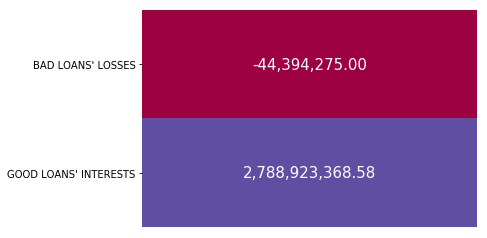

In [50]:
display(HTML("<b style='font-size:16px'> The financial results for test data without the predictive model throughout the loans' periods. </b>"))
display(HTML(('<b style="font-size:16px"> Gross Profit = \${:,.2f} [ROI = {:.2f}%] </b>'
              .format(gross_profit,roi))))
        
sns.heatmap( [[bad_loan_loss], [intrest_earned]],
             cbar=False,
             cmap='Spectral', 
             annot=True,
             fmt=',.2f',
             annot_kws={'size': 15},
             xticklabels=[],
             yticklabels=["BAD LOANS' LOSSES","GOOD LOANS' INTERESTS"],
            )
plt.show()


display(HTML("<b style='font-size:16px'>The results would have been better had the predictive model been deployed. </b>"))
display(HTML(('<b style="font-size:16px"> Gross Profit = \${:,.2f} [ROI = {:.2f}%], i.e. savings with the predictive model= <u>\${:,.0f}</u> [ROI\'s lift={:.2f}%] </b>'
             .format(gross_profit_with_the_model,roi_with_the_model,(gross_profit_with_the_model-gross_profit),(roi_with_the_model-roi)))))
        
sns.heatmap( [[bad_loan_loss_with_the_model], [intrest_earned_with_the_model]],
             cbar=False,
             cmap='Spectral', 
             annot=True,
             fmt=',.2f',
             annot_kws={'size': 15},
             xticklabels=[],
             yticklabels=["BAD LOANS' LOSSES","GOOD LOANS' INTERESTS"],
            )
plt.show()

### Changing the threshold of predicting default

In [52]:
# Threshold is for positive outcomes, ie
# the default is counted when the predicted proba of default is greater then the threshold

raw_df = load_raw_rows(load_test_data=True)
expected = y
enriched_test_df = pd.DataFrame(expected).join(raw_df, lsuffix='_test').reset_index()
predict_default_proba = the_best.predict_proba(X)[:,1]

@interact(Threshold=FloatSlider(value=.5,min=0,max=1,step=0.01),
          Pct=Checkbox(value=False,description='Cross tab data as %'),
          Show_Plot=Checkbox(value=False,description='Show Plot'))
def plot_confusion_matrix(Threshold,Pct,Show_Plot):
    
    if Threshold == 1:
        predicted_t = np.zeros( len(predict_default_proba) )
    elif Threshold == 0:
        predicted_t = np.ones( len(predict_default_proba) )
    else:
        predicted_t = np.where( predict_default_proba >= Threshold, 1, 0) 

    ct = pd.crosstab( expected, predicted_t, rownames=['Expected'], colnames=['Predicted'], margins=True, normalize=Pct)
    ct = ct.reindex(index=(1,0,'All'),columns=(1,0,'All'))
    ct.fillna(0,inplace=True)
    
    if Pct:
        ct = ct.applymap( lambda v: '{:.2f}%'.format(100*v) )

    ct.index = ['Truly Bad Loan', 'Truly Good Loan', 'Pred All']
    ct.columns = ['Pred Bad Loan', 'Pred Good Loan', 'Truly All']
    
    pred_t_s = pd.Series(predicted_t)
    pred_t_s.name = 'PRED'
    assert len(pred_t_s) == len(enriched_test_df)
    pred_n_test_df = pd.concat((pred_t_s,enriched_test_df), axis=1, ignore_index=False).set_index("id")
    
    # bad loan losses
    FN_df = pred_n_test_df.query("PRED==0 & DEFAULT==1")
    bad_loan_loss_with_the_model = -1 * FN_df.loan_amnt.sum()
    print("The pct threshold for loan default: {:d}%".format(int(100*Threshold)))
    print("Bad Loan Losses: {:,.2f}".format(bad_loan_loss_with_the_model))
    
    # interest earned
    TN_df = pred_n_test_df.query("PRED==0 & DEFAULT==0")
    intrest_earned_with_the_model_s = TN_df.loan_amnt * ( 1 + TN_df.int_rate/12 )**TN_df.term - TN_df.loan_amnt
    intrest_earned_with_the_model = intrest_earned_with_the_model_s.sum()
    print("Interest Earned: {:,.2f}".format(intrest_earned_with_the_model))
    
    # gross profit, ROI
    gross_profit_with_the_model = intrest_earned_with_the_model + bad_loan_loss_with_the_model
    roi_with_the_model = gross_profit_with_the_model/(FN_df.loan_amnt.sum()+TN_df.loan_amnt.sum())
    print("Gross Profit/Loss: {:,.2f} [ROI: {:,.3f}%]".format(gross_profit_with_the_model,roi_with_the_model))
    
    # plot bars
    if Show_Plot:
        plt.figure(figsize=(6,2))
        pd.Series({ 'Interest':intrest_earned_with_the_model,
                    'Losses':bad_loan_loss_with_the_model,
                    'Gross Profit':gross_profit_with_the_model } 
                 ).plot.bar(colormap='viridis')
        plt.grid()

    return ct


interactive(children=(FloatSlider(value=0.5, description='Threshold', max=1.0, step=0.01), Checkbox(value=False, description='Cross tab data as %'), Checkbox(value=False, description='Show Plot'), Output()), _dom_classes=('widget-interact',))

### Plotting Gross Profit as a function of model threshold

In [53]:
gross_profit_or_loss = []
gross_roi = []

for Threshold in np.linspace(0.01,.99,98):
    
    predicted_t = np.where( predict_default_proba >= Threshold, 1, 0) 

    pred_t_s = pd.Series(predicted_t)
    pred_t_s.name = 'PRED'
    assert len(pred_t_s) == len(enriched_test_df)
    pred_n_test_df = pd.concat((pred_t_s,enriched_test_df), axis=1, ignore_index=False).set_index("id")

    # bad loan losses
    FN_df = pred_n_test_df.query("PRED==0 & DEFAULT==1")
    bad_loan_loss_with_the_model = -1 * FN_df.loan_amnt.sum()

    # interest earned
    TN_df = pred_n_test_df.query("PRED==0 & DEFAULT==0")
    intrest_earned_with_the_model_s = TN_df.loan_amnt * ( 1 + TN_df.int_rate/12 )**TN_df.term - TN_df.loan_amnt
    intrest_earned_with_the_model = intrest_earned_with_the_model_s.sum()

    # gross profit, ROI
    gross_profit_with_the_model = intrest_earned_with_the_model + bad_loan_loss_with_the_model
    roi_with_the_model = gross_profit_with_the_model/(FN_df.loan_amnt.sum()+TN_df.loan_amnt.sum())
    
    # collect metrics 
    gross_profit_or_loss.append(gross_profit_with_the_model)
    gross_roi.append(roi_with_the_model)
    
    

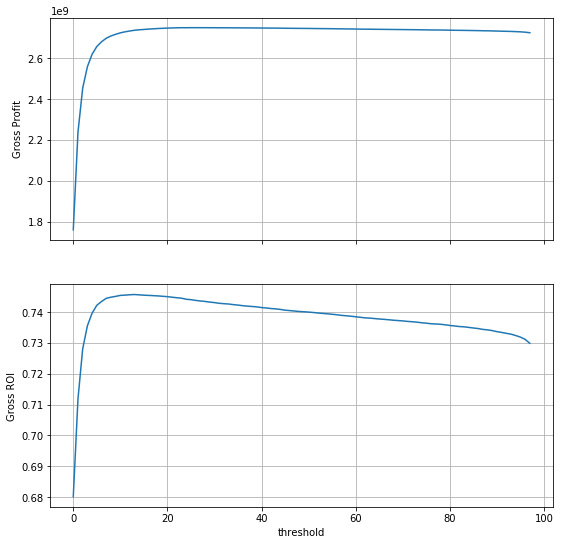

In [54]:
f, (a1,a2) = plt.subplots(2,1,sharex=True, figsize=(9,9))
a1.plot(gross_profit_or_loss)
a1.set_ylabel('Gross Profit')
a1.grid()
a2.plot(gross_roi)
a2.set_ylabel('Gross ROI')
a2.set_xlabel('threshold')
a2.grid()

### Coda

No, this is not the end of story. We still need to show to others the results of our exploration and come to a common understanding so that decisions can be made. Then importantly, we need to put the decisions into effect. Although the story is not sequential, since the new findings tend to change the course abraptly, there are some common themes that we need to think about. They are:

    S trategic aligment to make sure we are properly spending our time, effort, and money
    M etrics that can guide us on our journey and give an indication whether we are going in the right direction
    A nalytics that helps us extract the unbiased insights and get wiser in a deluge of data
    R eporting that communicates ideas and develops a common understanding of a problem or opportunity
    T ransformation that in the current times needs to be happening every day

..., but returning to the task at hand, iterating on it we can attempt to:
- train our models using some metrics that may be more meaningful to the business, eg ExpectedValue[NPV] rather than ROC AUC
- enhance the training data quality by way of feature engineering (which should improve the training and in turn give rise to better models)
- develop better DNN (theoretically, any model can become part of a net; consequently DNN may be considered to subsume any other model, and thus it can perform at least as good as ther model; it is just a matter of proper architecture/topology, training data and methods, time and resources to have DNN outperforming any other model)
- run try outs with some unsupervised methods, like clustering, anomaly detection, autoencoders, or generative adversarial methods, which might reveal something interesting
- ...


    Feb 9, 2018
    Olgierd Michalak

###### [Please move to the next notebook: *5. Presenting - Predictive Models for LC Defaults*](5. Presenting - Predictive Models for LC Defaults.ipynb)